# Notebook 6 B - Multi-Class Classification

## 6.B.1 Non-linear Classification Task

In a classification problem, the model learns from labeled data to assign labels to new, unseen instances (generalization) based on their features. We will will use neural network based models that output probabilities for possible classes, helping make informed decisions based on the predicted categories. We will further work with the MNIST dataset (Modified National Institute of Standards and Technology) which is a classic dataset widely used for training and testing machine learning models in image classification tasks. It consists of 70,000 grayscale images of handwritten digits from 0 to 9, split into 60,000 training images and 10,000 test images.

Each image in the dataset is 28x28 pixels, unrolled into a 784-dimensional vector for modeling (our input space). This dataset serves as a benchmark for machine learning algorithms, as it presents a relatively simple, yet meaningful task: identifying handwritten digits. Despite its simplicity, the MNIST dataset is a great starting point for building and evaluating classification models.

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
# The astype forces a conversion to a class as an int (not a string)
X, y = mnist["data"], mnist["target"].astype(int)


/Users/mschilling/miniforge3/envs/tf_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/mschilling/miniforge3/envs/tf_env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### One-hot encoding 

In multi-class classification, often one-hot encoding is used. This is a technique used to represent categorical data as binary vectors. In the context of classification, it converts each class label into a binary vector, where only the index corresponding to the class is set to 1, and all other indices are set to 0. This format is useful in machine learning because it provides a standardized way to handle categorical labels in numerical computations.

For example, in the MNIST dataset with digits 0 to 9, the label "3" would be represented as:

`[0,0,0,1,0,0,0,0,0,0]`

This encoding is beneficial in training neural networks, as it enables the model to distinguish among all classes during optimization.

Task:

* Extract from the data a set that contains all classes and
* split this into a training and a test set.
* For the target

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def load_all_classes(X, y, num_train=60000, num_test=10000):
    """
    Load MNIST data for all digits (0-9) and split into train and test sets with one-hot encoding.
    
    Parameters:
    - X: np.array, feature data for all samples (e.g., from MNIST)
    - y: np.array, target labels for all samples (e.g., from MNIST)
    - num_train: int, number of samples to return in the training set (default: 60000)
    - num_test: int, number of samples to return in the test set (default: 10000)
    
    Returns:
    - X_train, y_train: training data and one-hot encoded labels
    - X_test, y_test: test data and one-hot encoded labels
    """
    # One-hot encode the labels
    encoder = OneHotEncoder(sparse=False, categories='auto')
    y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

    # Shuffle and split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, train_size=num_train, test_size=num_test, random_state=42, stratify=y)

    return X_train, y_train, X_test, y_test

# Use the function to load and split the MNIST dataset
X_train, y_train, X_test, y_test = load_all_classes(X, y, num_train=1000, num_test=1000)

# Display shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1000, 784) (1000, 10)
Test set shape: (1000, 784) (1000, 10)


/Users/mschilling/miniforge3/envs/tf_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Explanation

* For One-Hot Encoding: `OneHotEncoder` from `sklearn.preprocessing` is used to convert the labels into a one-hot encoded format, where each label is represented by a binary vector of length 10.
* Data Splitting: `train_test_split` is used to split the dataset into training and test sets, with stratification on y to ensure balanced representation of each class in both sets.
* Return Values: The function returns `X_train, y_train, X_test`, and `y_test`, with `y_train` and `y_test` in a one-hot encoded format.

**Task:**

Adapt the old routine for visualization, now using the one-hot encoded targets (`y_train`).

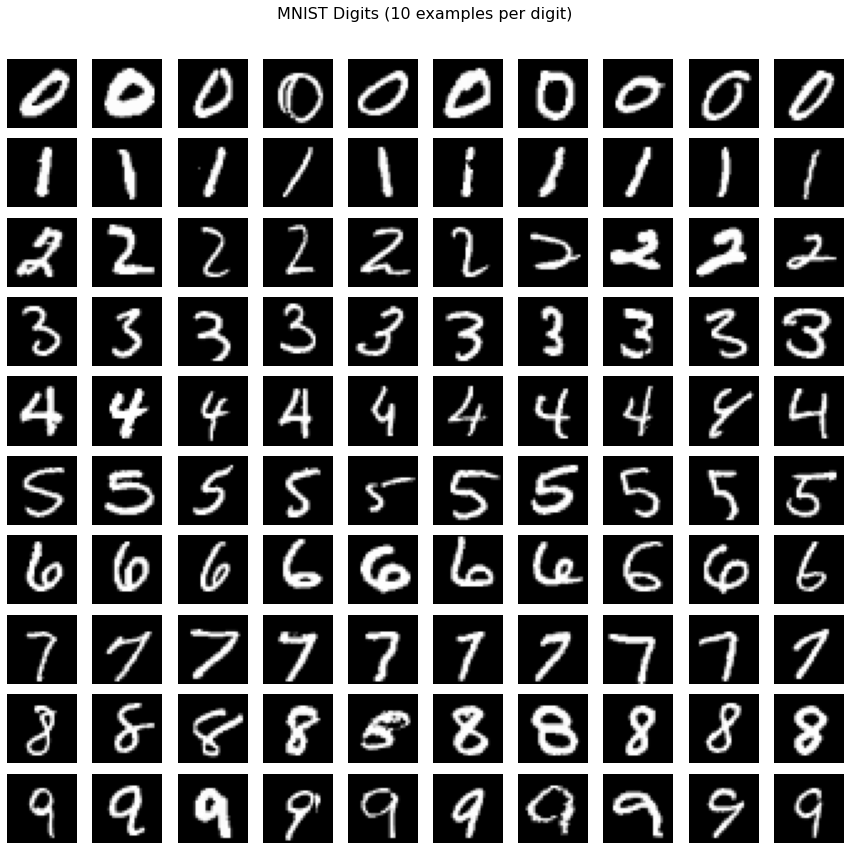

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml


# Set up a 10x10 grid of subplots
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("MNIST Digits (10 examples per digit)", fontsize=16)

# Loop over each digit (0 to 9)
for digit in range(10):
    # Find indices for the current digit in the one-hot encoded labels
    digit_indices = np.where(y_train[:, digit] == 1)[0]
    
    # Loop over the first 10 examples of the current digit
    for i in range(10):
        # Select the image and reshape to 28x28
        image = X_train[digit_indices[i]].reshape(28, 28)
        
        # Plot the image in the corresponding subplot
        ax = axes[digit, i]
        ax.imshow(image, cmap="gray")
        ax.axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


## 6.B.2 Activation Function

In multi-class classification, the commonly used activation function for the output layer is the **softmax function**. Softmax is particularly suitable because it converts the raw output scores from the network into a probability distribution across the classes, making it easy to interpret and evaluate the model's predictions.

#### Why Use Softmax?

- **Probability Distribution**: Softmax transforms the output into a probability distribution, where each class's probability is between 0 and 1, and all probabilities sum to 1.
- **Class Prediction**: The class with the highest probability can be taken as the model's predicted class, which is straightforward in multi-class classification.

#### Softmax Formula

Given the output scores $z_i$ for each class $i$, softmax is defined as:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

where $K$ is the number of classes. This formula ensures that each output $\text{softmax}(z_i)$ is in the range (0, 1) and that all outputs sum to 1.
In a neural network model for multi-class classification, softmax is typically applied to the final layer's output to yield class probabilities. 

**Task:**

Your goal is to create a class `SoftmaxActivationFunction` that implements the softmax activation function and its derivative.

This class should have the following methods:

* `__call__(self, x)`: This method should calculate and return the output of the softmax function for a given input \( x \). For multi-class classification, the input \( x \) should be a 2D array where each row represents a set of raw class scores, and the output should be a probability distribution across classes for each row.

* `derivative(self, x)`: This method should calculate and return the Jacobian matrix of the softmax function for each input row in \( x \). For each row, the Jacobian matrix should be computed to understand how the probability for each class changes with respect to each raw class score.

The `SoftmaxActivationFunction` class will allow you to apply the softmax function in multi-class classification problems and compute its derivative for use in backpropagation.

In [4]:
import numpy as np

class SoftmaxActivationFunction:
    """
    A class implementing the softmax activation function and its derivative.
    """

    def __call__(self, x):
        """
        Calculate the softmax activation function for a given input x.

        Parameters:
        x : np.array
            The input array, where each row represents a set of raw class scores.

        Returns:
        np.array
            The softmax output probabilities for each row in x.
        """
        # Subtract max value for numerical stability
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def derivative(self, x):
        """
        Calculate the Jacobian matrix of the softmax function for a given input x.

        Parameters:
        x : np.array
            The input array, where each row represents a set of raw class scores.

        Returns:
        np.array
            The Jacobian matrix of the softmax function for each row in x.
        """
        s = self.__call__(x)
        return np.array([np.diagflat(s[i]) - np.outer(s[i], s[i]) for i in range(x.shape[0])])


---

## 6.B.3 Single Layer Neural Network Model

As a next step, we are now adapting our neural network model. Reminder: It consists of two main components:

1. **Weighted Sum**: Each input feature is multiplied by a weight, and the results are summed together along with a bias term. This produces a linear combination of the inputs, which we can think of as a linear regression model.
2. **Activation Function**: After computing the weighted sum, we apply a **non-linear activation function** (in this case, the sigmoid function) to introduce non-linearity into the model. The sigmoid function is defined as:

You will adapt a simplified neural network model to handle multi-class classification. Multi-class classification requires several changes compared to binary classification, especially in the choice of activation function and loss function.

#### Key Changes in Multi-Class Classification

1. **Softmax Activation Function**:
   - For multi-class classification, the **softmax** activation function is used in the output layer instead of sigmoid.
   - Softmax transforms the raw output scores from the network into a probability distribution across classes, making it easy to interpret the model's confidence in each class.

2. **Weight Matrix Initialization**:
   - Instead of a single weight vector for binary classification, we initialize a weight matrix where each row corresponds to a class. This allows each class to have its own set of weights.

3. **Cross-Entropy Loss**:
   - **Cross-Entropy Loss** is more appropriate for multi-class classification than Mean Squared Error (MSE). Cross-entropy measures the difference between the predicted probability distribution and the true distribution (one-hot encoded labels), penalizing incorrect predictions more effectively.

#### Implementation Details

In the neural network, this structure requires a few specific adjustments:

- **Softmax Activation**: We replace the sigmoid activation function with a `SoftmaxActivationFunction` class. Softmax outputs probabilities for each class, which sum to 1 across all classes for each sample.

- **Gradient Computation**: The derivative of the Cross-Entropy Loss with Softmax activation is calculated as the difference between the predicted probabilities and the one-hot encoded labels.

### Task: Modify the Activation Function

* Replace Sigmoid with Softmax in the Neural Network: Modify the neural network's activation function by replacing the sigmoid activation with the softmax function in the output layer.

### Question: How Should the Derivative in the Backward Pass Be Changed?

To compute the gradient of the Cross-Entropy Loss with respect to the weights when using softmax, consider the following:

- **Cross-Entropy Loss with Softmax**: The gradient of the loss with respect to the output layer (before applying softmax) can be represented simply as $\text{output} - \text{target}$, where `output` is the softmax probability for each class, and `target` is the one-hot encoded true label.

1. **What does this gradient represent?**
   - Why does using $\text{output} - \text{target}$ as the gradient work for both the Cross-Entropy Loss and softmax?
2. **Implementing the Gradient Calculation**:
   - Add the backward pass to the model with this new gradient calculation, and see how it differs from the sigmoid activation with MSE.

This task will help you understand the specific changes needed in the activation and loss functions for multi-class classification, along with their corresponding gradient adjustments.

In [5]:
import numpy as np
from sklearn.metrics import log_loss, accuracy_score

class MultiClassNeuralNetwork:
    """
    A simplified neural network model with one layer that performs mini-batch gradient descent
    for multi-class classification.
    """
    
    def __init__(self, input_dim, output_dim, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.weights = np.random.rand(output_dim, input_dim + 1) * 0.01  # Initialize weights for each class
        self.loss_history = []  # List to store loss at each iteration
        self.test_accuracy_history = []  # List to store test accuracy at each iteration
        self.activation_function = SoftmaxActivationFunction()  # Use the SoftmaxActivationFunction class

    def add_bias_column(self, X):
        """
        Add a bias column (of ones) to the input data.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
            
        Returns:
        X_with_bias : np.array, shape (n_samples, input_dim + 1)
            The input with an added bias column.
        """
        return np.c_[np.ones(X.shape[0]), X]

    def forward(self, X):
        """
        Perform the forward pass through the single layer.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim + 1)
            The input feature values with bias column.
            
        Returns:
        layer_output : np.array, shape (n_samples, output_dim)
            Output probabilities for each class after applying softmax.
        """
        layer_input = np.dot(X, self.weights.T)
        layer_output = self.activation_function(layer_input)  # Softmax for multi-class output
        return layer_output
    
    def predict(self, X):
        """
        Make predictions using the trained model.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
            
        Returns:
        predictions : np.array, shape (n_samples,)
            Predicted class labels for each sample.
        """
        X_with_bias = self.add_bias_column(X)  # Add bias column
        probabilities = self.forward(X_with_bias)
        return np.argmax(probabilities, axis=1)

    def fit_batch(self, X, y, X_test, y_test, batch_size=32):
        """
        Fit the model using mini-batch gradient descent with specified batch size.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
        y : np.array, shape (n_samples, output_dim)
            The one-hot encoded true labels for each sample.
        X_test : np.array, shape (n_samples_test, input_dim)
            Test set input features for tracking test accuracy.
        y_test : np.array, shape (n_samples_test, output_dim)
            One-hot encoded test set labels for tracking test accuracy.
        batch_size : int
            The size of each mini-batch for training (default is 32).
        """
        X_with_bias = self.add_bias_column(X)
        n_samples = X.shape[0]
        
        for _ in range(self.n_iterations):
            # Shuffle the data at the beginning of each epoch
            indices = np.random.permutation(n_samples)
            X_shuffled = X_with_bias[indices]
            y_shuffled = y[indices]
            
            # Process each mini-batch
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                # Forward pass: calculate predictions
                layer_output = self.forward(X_batch)

                # Backward pass: calculate the gradient for the weights
                delta = (layer_output - y_batch)  # Gradient of the cross-entropy loss with softmax
                gradient = np.dot(delta.T, X_batch) / X_batch.shape[0]
                
                # Update weights
                self.weights -= self.learning_rate * gradient
            
            # Calculate Cross-Entropy Loss over the entire dataset for monitoring
            epoch_output = self.forward(X_with_bias)
            loss = log_loss(y, epoch_output)
            self.loss_history.append(loss)
            
            # Calculate accuracy on the test set
            y_test_labels = np.argmax(y_test, axis=1)
            y_pred_test = self.predict(X_test)
            test_accuracy = accuracy_score(y_test_labels, y_pred_test)
            self.test_accuracy_history.append(test_accuracy)

    def get_loss_history(self):
        """
        Get the history of loss values during training.
        
        Returns:
        loss_history : list
            List of loss values recorded at each iteration.
        """
        return self.loss_history

    def get_test_accuracy_history(self):
        """
        Get the history of test accuracy values during training.
        
        Returns:
        test_accuracy_history : list
            List of test accuracy values recorded at each iteration.
        """
        return self.test_accuracy_history


### Explanation of Gradient in Multi-Class Classification

In multi-class classification, we commonly use **Cross-Entropy Loss** with the **softmax** activation function. When combined, they lead to a simplified gradient in the backward pass, represented by:

$$
\text{gradient} = \text{output} - \text{target}
$$

Here’s why this simplification works:

- **Softmax Activation Function**: Softmax outputs a probability distribution over the classes. For each class $i$, the probability is given by:
  
  $$
  \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
  $$

- **Cross-Entropy Loss**: The cross-entropy loss function for a single sample is defined as:

  $$
  \text{Loss} = -\sum_{i} y_i \log(\hat{y}_i)
  $$

  where $y_i$ is the true label (in one-hot encoded form) and $\hat{y}_i$ is the softmax probability for class $i$.

#### Why Does `output - target` Work as the Gradient?

When we compute the derivative of the cross-entropy loss with respect to each class score $z_i$ (the input to softmax), we find that:

$$
\frac{\partial \text{Loss}}{\partial z_i} = \hat{y}_i - y_i
$$

where:
- $\hat{y}_i$ is the softmax output (predicted probability) for class $i$,
- $y_i$ is the true label (1 for the correct class, 0 otherwise in a one-hot encoded vector).

This results from the chain rule and is a special property of using Cross-Entropy Loss with softmax. This combination effectively simplifies the gradient to the difference between the predicted probability and the target probability for each class.

Thus, **`output - target` directly gives the gradient of the loss with respect to the raw class scores**. This gradient tells us how much we need to adjust each class score to reduce the loss, moving the predicted probability closer to the true label.

### Implementing the Gradient Calculation

To implement this in the backward pass:

- **Using the Gradient**: Instead of calculating separate derivatives for the softmax function and cross-entropy loss (in two steps), we can directly use `output - target` as the gradient when updating the weights.
- **Weight Update**: In the backward pass, multiply this gradient by the input features and average over the batch to obtain the gradient with respect to each weight in the network.

**Task:**

* Train your model and plot the training curve.

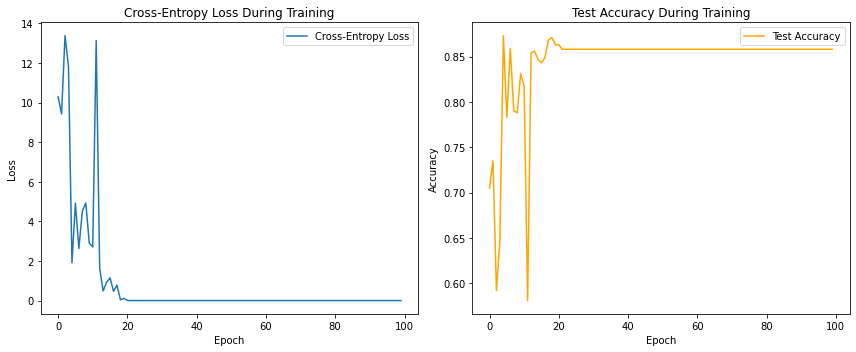

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize and train the MultiClassNeuralNetwork model with mini-batch gradient descent
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]  # Number of classes (10 for MNIST digits 0-9)
model = MultiClassNeuralNetwork(input_dim=input_dim, output_dim=output_dim, learning_rate=0.01, n_iterations=100)
model.fit_batch(X_train, y_train, X_test, y_test, batch_size=32)  # Using a batch size of 32

# Plot the loss history and test accuracy during training
plt.figure(figsize=(12, 5))

# Plot the training loss
plt.subplot(1, 2, 1)
plt.plot(model.get_loss_history(), label="Cross-Entropy Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Cross-Entropy Loss During Training")
plt.legend()

# Plot the test accuracy
plt.subplot(1, 2, 2)
plt.plot(model.get_test_accuracy_history(), label="Test Accuracy", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy During Training")
plt.legend()

plt.tight_layout()
plt.show()


Accuracy on test set: 85.80%


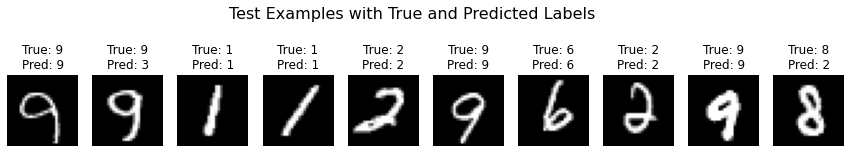

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Number of examples to display
num_examples = 10

# Select random indices from the test set
random_indices = np.random.choice(len(X_test), num_examples, replace=False)

# Get the selected test images, true labels, and predictions
selected_images = X_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)  # Convert one-hot encoded true labels to class labels
predicted_labels = model.predict(selected_images)  # Predicted class labels

# Calculate accuracy on the entire test set
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to class labels
y_pred_test = model.predict(X_test)  # Predicted labels on the entire test set
accuracy = accuracy_score(y_test_labels, y_pred_test)

print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Plot the examples
fig, axes = plt.subplots(1, num_examples, figsize=(15, 3))
fig.suptitle("Test Examples with True and Predicted Labels", fontsize=16)

for i, ax in enumerate(axes):
    # Reshape the image to 28x28 for display
    ax.imshow(selected_images[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")

plt.show()


For a better understanding on the models capabilities, have a look at a confusion matrix (computed below).

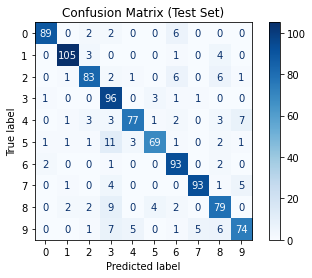

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Convert one-hot encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)  # True labels
y_pred = model.predict(X_test)  # Predicted labels

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test_labels, y_pred)

# Display the confusion matrix for the test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.arange(10))
disp_test.plot(cmap="Blues")
plt.title("Confusion Matrix (Test Set)")
plt.show()


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 10.11.2024; Explanations were initially generated and afterwards edited;</i>
</div>